In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from geopy.geocoders import Nominatim

%matplotlib inline

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
df= pd.read_csv('/content/titanic.csv')
train_test_data = [train, test]

In [ ]:
#데이터프레임의 열 목록 확인
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [ ]:
#미리보기
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


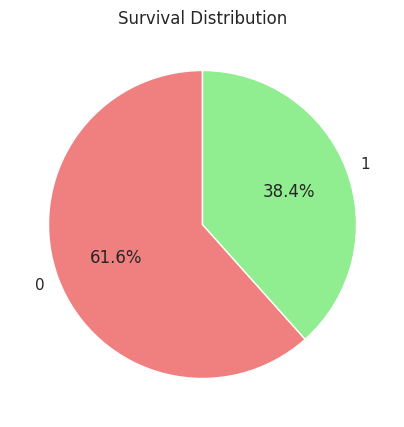

In [ ]:
#생존자를 원그래프로 확인해보겠습니다.
survived_counts = df['survived'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Survival Distribution')
plt.show()

In [ ]:
#생존자와 사망자 중 남녀 비율 확인해보았습니다. 사망자는 남성이 압도적으로 많았고, 생존자는 여성이 많습니다.
fig = px.sunburst(df, path=['survived', 'sex'], title='Survival and Gender Sunburst Chart')
fig.show()


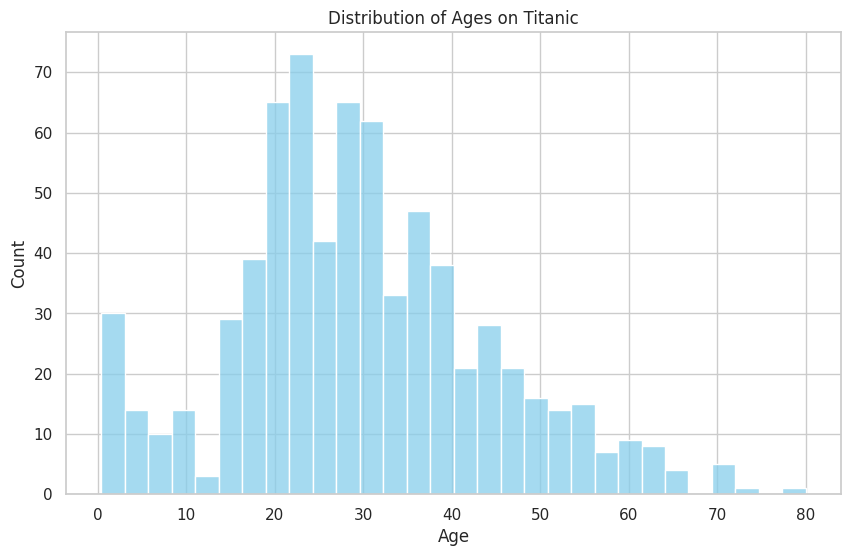

In [ ]:
# 나이대에 따른 타이타닉 탑승 인원을 막대그래프로 나타내봤습니다.
plt.figure(figsize=(10, 6))

sns.histplot(df['age'].dropna(), bins=30, kde=False, color='skyblue')
plt.title('Distribution of Ages on Titanic')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [ ]:
# 나이에 따른 생존자와 사망자의 막대그래프
fig = px.histogram(df, x='age', color='survived', nbins=30,
                   labels={'age': 'Age', 'survived': 'Survival'},
                   title='나이에 따른 생존여부')
fig.show()

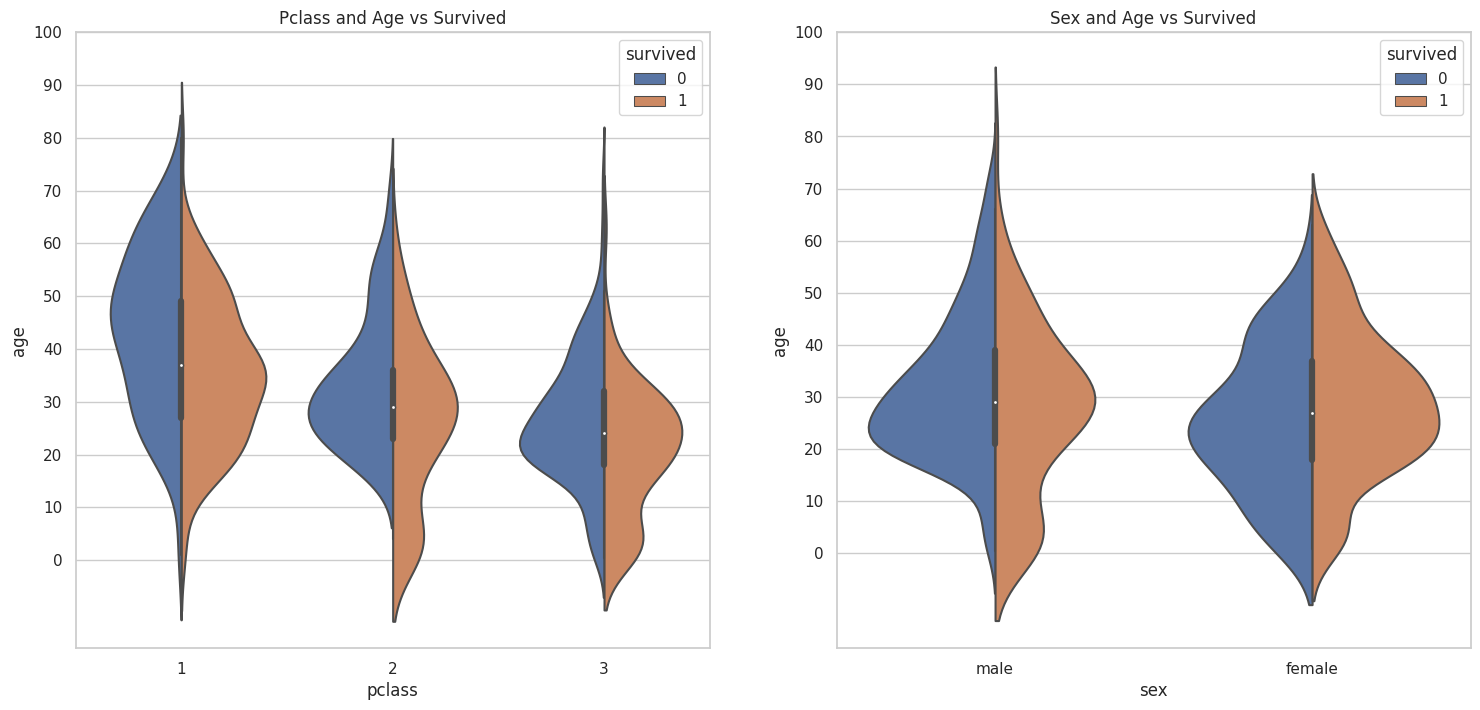

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# 첫 번째 subplot
sns.violinplot(x='pclass', y='age', hue='survived', data=df, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# 두 번째 subplot
sns.violinplot(x='sex', y='age', hue='survived', data=df, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()


<ipython-input-124-f0dee9c928b0>:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




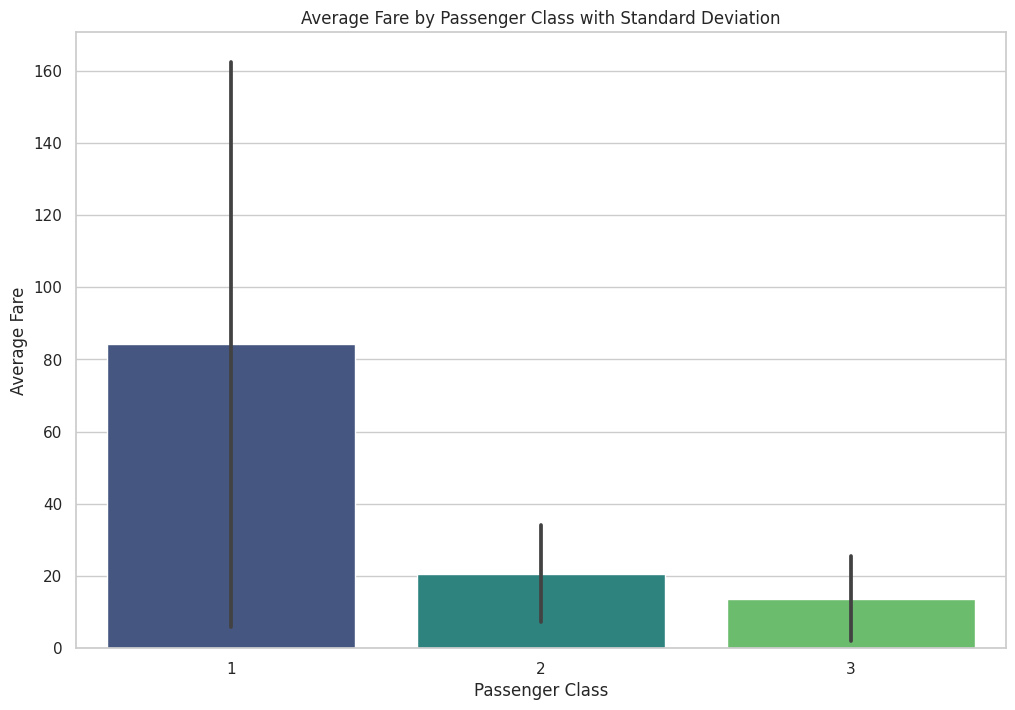

             mean  min       max
pclass                          
1       84.154687  0.0  512.3292
2       20.662183  0.0   73.5000
3       13.675550  0.0   69.5500


In [ ]:
# 클래스에 따른 요금의 평균 그래프를 나타내고, 최고값과 최저값 나타내어 보았습니다.class가 1인 사람의 최고 가격은 160이 넘습니다.
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='pclass', y='fare', ci='sd', palette='viridis')
plt.title('Average Fare by Passenger Class with Standard Deviation')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.show()
class_fare_stats = df.groupby('pclass')['fare'].agg(['mean', 'min', 'max'])
print(class_fare_stats)


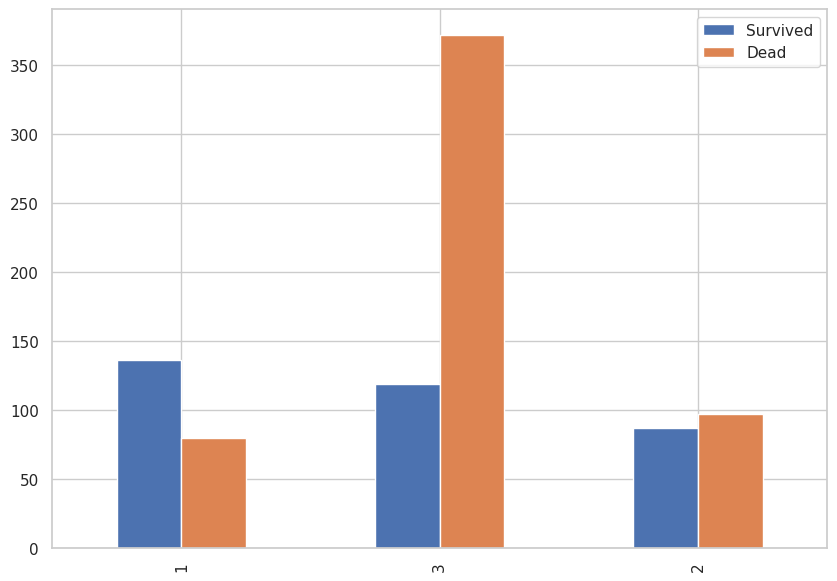

In [ ]:
#pclass에 따른 생존자와 사망자를 알아보았다. class 3인 승객의 죽음이 압도적으로 많다.
def bar_chart(feature):
    survived = train.loc[train["Survived"]==1, feature].value_counts()
    dead = train.loc[train["Survived"]==0, feature].value_counts()
    data = pd.DataFrame([survived, dead], index=["Survived", "Dead"]).transpose()
    data.plot(kind="bar", figsize=(10, 7))
    plt.show()

bar_chart("Pclass")


In [ ]:
#1등급일수록 생존율이 높다. 2등급은 10대 중반이후는 모두 구조되었지만, 3등급은 10대라 할지라도 반이하가 구조되었다.
fig = px.scatter(df, x='age', y='pclass', color='survived',
                 labels={'age': 'Age', 'pclass': 'Pclass', 'survived': 'Survived'},
                 title='Scatter Plot of Age and Pclass with Survival',
                 opacity=0.4)

fig.show()


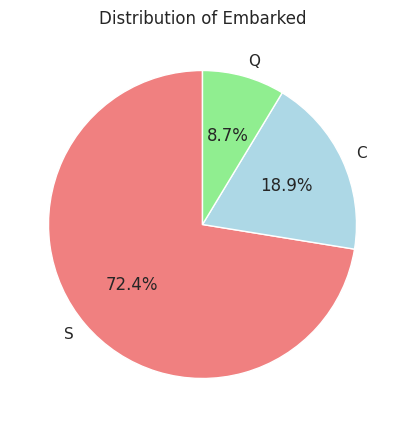

In [ ]:
#
embarked_counts = df['embarked'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Distribution of Embarked')
plt.show()

<Axes: xlabel='embarked', ylabel='count'>

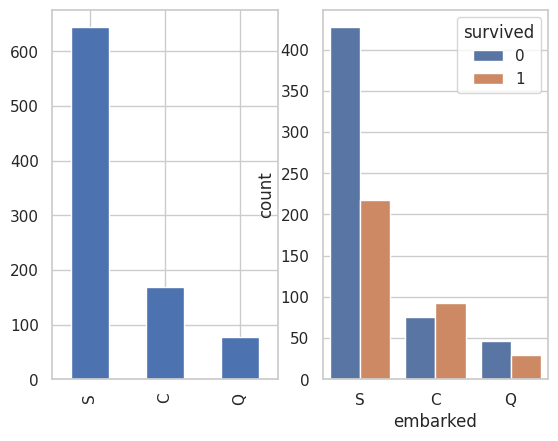

In [ ]:
plt.subplot(1,2,1)
df["embarked"].value_counts().plot(kind = "bar")
plt.subplot(1,2,2)
sns.countplot(data=df, x="embarked", hue="survived")

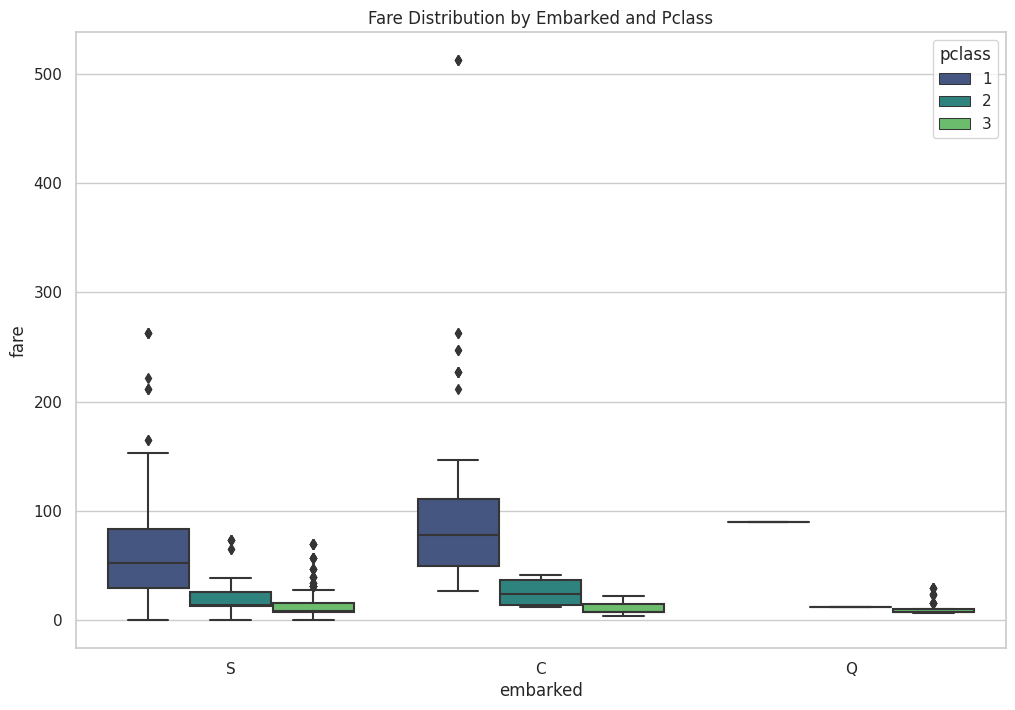

In [ ]:
# embarked에 따른 pclass와 fare
plt.figure(figsize=(12, 8))
sns.boxplot(x='embarked', y='fare', hue='pclass', data=df, palette='viridis')
plt.title('Fare Distribution by Embarked and Pclass')
plt.show()


<ipython-input-112-9b2548ec9782>:7: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

40.2% of the points cannot be placed; you may want to

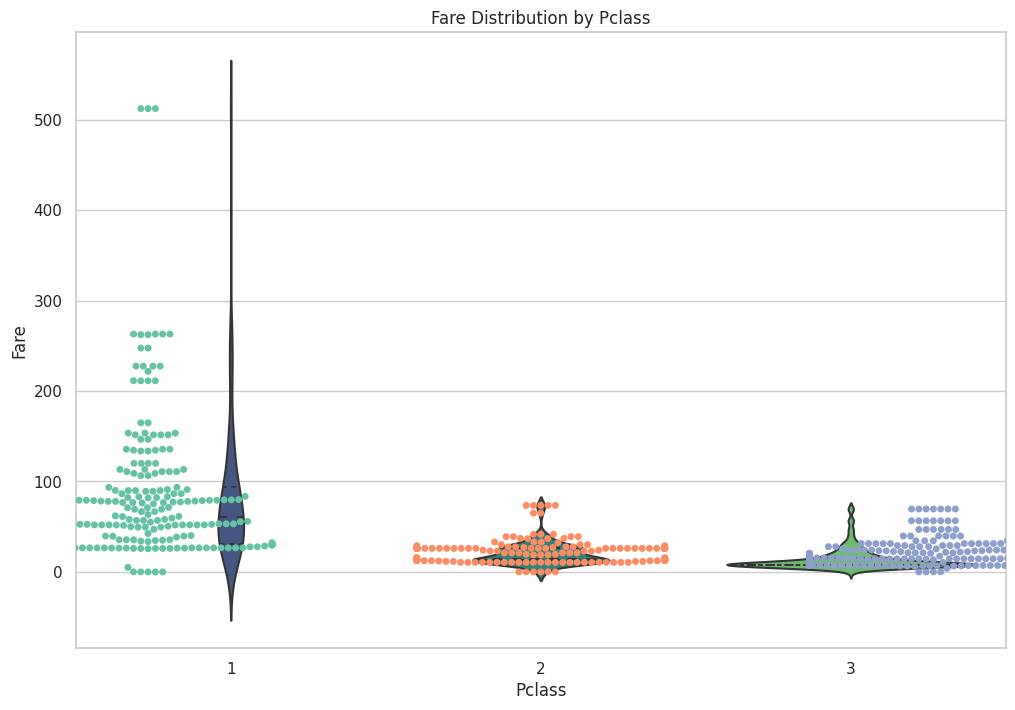

In [ ]:
#등급에 따른 요

# 스완 플롯과 바이올린 플롯 그리기
plt.figure(figsize=(12, 8))

# 스완 플롯
sns.swarmplot(x='pclass', y='fare', data=df, palette='Set2', dodge=True, size=5)

# 바이올린 플롯
sns.violinplot(x='pclass', y='fare', data=df, palette='viridis', inner='quartile')

plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

In [ ]:
fig = px.histogram(df, x='fare', color='survived', nbins=30,
                   labels={'fare': 'Fare', 'survived': 'Survival'},
                   title='Survival Distribution by Fare')
fig.show()

In [ ]:
# Scatter Plot: 나이와 요금에 따른 생존자와 사망자
plt.figure(figsize=(15, 15))
sns.scatterplot(data=df, x='age', y='fare', hue='survived', palette={0: 'red', 1: 'green'}, alpha=0.4)

plt.xticks(range(0, 101, 10))
plt.title('Scatter Plot of Age and Fare with Survival')

plt.show()


2.생존자/사망자 예측

In [1]:
train.head()

NameError: ignored

In [ ]:
test.head()

In [ ]:
#2-1.데이터 전처리, 결측치 찾아보기.

train.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
#2-1-1) 불필요한 요소이기에 train에서 PassengerId, Name, Ticket을 삭제한다.

# 훈련 데이터
train.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace = True)
# 테스트 데이터
test.drop(["Name", "Ticket"], axis = 1, inplace = True)

In [ ]:
#2-1-2) Age 결측치를 평균값으로 채우는 것으로 해결한다.
age_before = test[test['Age'].isnull()]
mean_age = test['Age'].mean()

test['Age'] = test['Age'].fillna(mean_age)
test[test.index.isin(age_before.index)]

In [ ]:
test[test['Age'].isnull()]
test['Age'].plot(kind='hist')

In [ ]:
#2-1-3) embarked 의 결측치
train["Embarked"].value_counts().sort_values(ascending = False)
test["Embarked"].value_counts().sort_values(ascending = False)
train["Embarked"].fillna("S", inplace = True)
test["Embarked"].fillna("S", inplace = True)

In [ ]:
embarked_train_dummies = pd.get_dummies(train["Embarked"])
embarked_test_dummies = pd.get_dummies(train["Embarked"])

embarked_train_dummies.columns = ["S", "C", "Q"]
embarked_test_dummies.columns = ["S", "C", "Q"]

train.drop("Embarked", axis = 1, inplace = True)
test.drop("Embarked", axis = 1, inplace = True)

df_train = train.join(embarked_train_dummies)
df_test = test.join(embarked_test_dummies)

In [ ]:
#2-1-4) cabin 결측치
train = train.drop(["Cabin"], axis = 1)
test = test.drop(["Cabin"], axis = 1)

In [ ]:
#2-1-5) Fare의 전처리
test["Fare"].fillna(0, inplace = True)

In [ ]:
#2-1-6) 가족 만들기
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1

    dataset.loc[dataset['FamilySize'] > 1, 'IsAlone'] = 0


2-2. 데이터 분석

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle